## importing packages

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import tabulate

In [2]:
np.set_printoptions(precision=4)

## Loading the image

In [3]:
img = nib.load('sub-HC001_ses-01_acq-mp2rage_T1map.nii.gz')
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 320 320   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  0.8 0.8 0.8 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.0'
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -0.06856307
quatern_c       : -0.015582562
quatern_d       : -0.019387364
qoffset_x       : -92.05724
qoffset_y       : -107.88861
qoffset_z       : -116.

In [4]:
img_data = img.get_fdata()
img_data.shape

(240, 320, 320)

In [5]:
img.affine

array([[ 7.9901e-01,  3.2647e-02, -2.2739e-02, -9.2057e+01],
       [-2.9228e-02,  7.9188e-01,  1.0989e-01, -1.0789e+02],
       [ 2.6993e-02, -1.0893e-01,  7.9209e-01, -1.1685e+02],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [6]:
img.header['pixdim']

array([1. , 0.8, 0.8, 0.8, 0. , 0. , 0. , 0. ], dtype=float32)

## Sampling using nibabel.slicer

sample every 5 slices

In [7]:
sampled_img = img.slicer[::5,:,:]

In [8]:
sampled_img.shape

(48, 320, 320)

In [9]:
sampled_img.affine

array([[ 3.9951e+00,  3.2647e-02, -2.2739e-02, -9.2057e+01],
       [-1.4614e-01,  7.9188e-01,  1.0989e-01, -1.0789e+02],
       [ 1.3496e-01, -1.0893e-01,  7.9209e-01, -1.1685e+02],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [10]:
print(sampled_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  48 320 320   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  4.  0.8 0.8 1.  1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.0'
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : -0.06856307
quatern_c       : -0.015582562
quatern_d       : -0.019387364
qoffset_x       : -92.05724
qoffset_y       : -107.88861
qoffset_z       : -116.

In [11]:
sampled_img.header['pixdim']

array([1. , 4. , 0.8, 0.8, 1. , 1. , 1. , 1. ], dtype=float32)

the pixdim has changed to [4, 0.8, 0.8]

## now let's save the image

In [12]:
nib.save(sampled_img, 'sub-HC001_ses-01_acq-mp2rage_T1map_sampled.nii.gz')

In [13]:
sampled_loaded = nib.load('sub-HC001_ses-01_acq-mp2rage_T1map_sampled.nii.gz')

In [14]:
sampled_loaded_data = sampled_loaded.get_fdata()

In [15]:
print(sampled_loaded.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  48 320 320   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  4.  0.8 0.8 1.  1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.0'
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : -0.06856307
quatern_c       : -0.015582562
quatern_d       : -0.019387364
qoffset_x       : -92.05724
qoffset_y       : -107.88861
qoffset_z       : -116.

## checking both sampled and original images

In [16]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for original image')

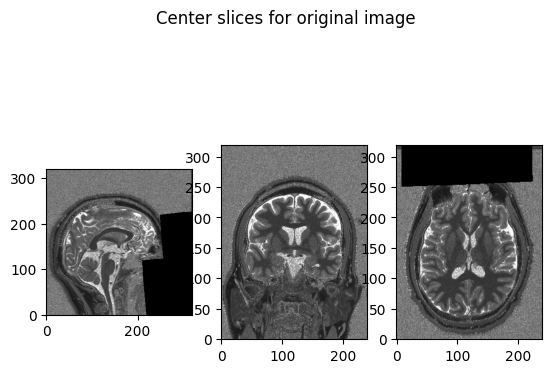

In [17]:
original_shape = img.shape
slice_0 = img_data[original_shape[0]//2, :, :]
slice_1 = img_data[:, original_shape[1]//2, :]
slice_2 = img_data[:, :, original_shape[2]//2]
show_slices([slice_0, slice_1, slice_2])

plt.suptitle("Center slices for original image") 

Text(0.5, 0.98, 'Center slices for sampled image')

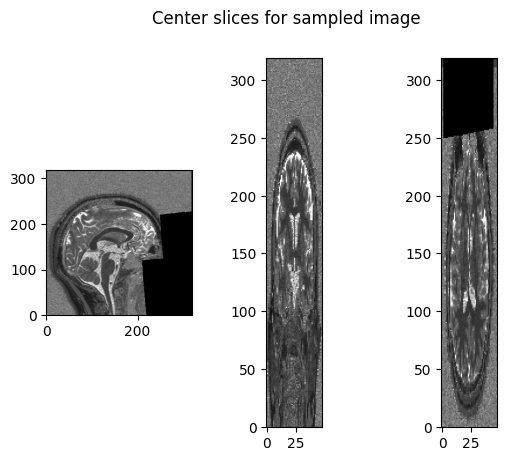

In [18]:
sampled_shape = sampled_loaded.shape
slice_0 = sampled_loaded_data[sampled_shape[0]//2, :, :]
slice_1 = sampled_loaded_data[:, sampled_shape[1]//2, :]
slice_2 = sampled_loaded_data[:, :, sampled_shape[2]//2]
show_slices([slice_0, slice_1, slice_2])

plt.suptitle("Center slices for sampled image") 

In [19]:
header_original = img.header.structarr
header_sampled = sampled_loaded.header.structarr

header_params = img.header.keys()

compare = []
for param in header_params:
    compare.append([param, header_original[param].tolist(), header_sampled[param].tolist()])

table = tabulate.tabulate(compare, tablefmt='html')

table


sizeof_hdr,348,348
data_type,b'',b''
db_name,b'',b''
extents,0,0
session_error,0,0
regular,b'r',b'r'
dim_info,0,0
dim,"[3, 240, 320, 320, 1, 1, 1, 1]","[3, 48, 320, 320, 1, 1, 1, 1]"
intent_p1,0.0,0.0
intent_p2,0.0,0.0
intent_p3,0.0,0.0


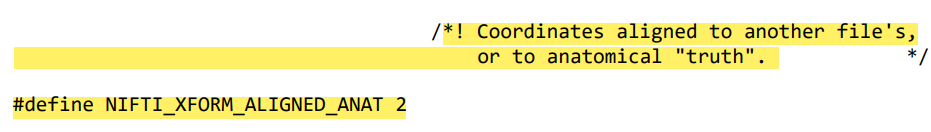

sform_code =  2 , which implies the above

In [20]:
sampled_img.header.get_qform_quaternion()

array([ 0.9973, -0.0686, -0.0156, -0.0194])

In [21]:
print(sampled_img.header.get_qform())
print(img.header.get_qform())

[[ 3.9951e+00  3.2647e-02 -2.2739e-02 -9.2057e+01]
 [-1.4614e-01  7.9188e-01  1.0989e-01 -1.0789e+02]
 [ 1.3496e-01 -1.0893e-01  7.9209e-01 -1.1685e+02]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]]
[[ 7.9901e-01  3.2647e-02 -2.2739e-02 -9.2057e+01]
 [-2.9228e-02  7.9188e-01  1.0989e-01 -1.0789e+02]
 [ 2.6993e-02 -1.0893e-01  7.9209e-01 -1.1685e+02]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]]


In [22]:
print(sampled_img.header.get_sform())
print(img.header.get_sform())

[[ 3.9951e+00  3.2647e-02 -2.2739e-02 -9.2057e+01]
 [-1.4614e-01  7.9188e-01  1.0989e-01 -1.0789e+02]
 [ 1.3496e-01 -1.0893e-01  7.9209e-01 -1.1685e+02]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [23]:
print(sampled_img.affine)
print(img.affine)

[[ 3.9951e+00  3.2647e-02 -2.2739e-02 -9.2057e+01]
 [-1.4614e-01  7.9188e-01  1.0989e-01 -1.0789e+02]
 [ 1.3496e-01 -1.0893e-01  7.9209e-01 -1.1685e+02]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]]
[[ 7.9901e-01  3.2647e-02 -2.2739e-02 -9.2057e+01]
 [-2.9228e-02  7.9188e-01  1.0989e-01 -1.0789e+02]
 [ 2.6993e-02 -1.0893e-01  7.9209e-01 -1.1685e+02]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]]


only the first column differs

In [24]:
print(sampled_img.header.get_best_affine())
print(img.header.get_best_affine())
print(img.header.get_best_affine() == sampled_img.header.get_best_affine())

[[ 3.9951e+00  3.2647e-02 -2.2739e-02 -9.2057e+01]
 [-1.4614e-01  7.9188e-01  1.0989e-01 -1.0789e+02]
 [ 1.3496e-01 -1.0893e-01  7.9209e-01 -1.1685e+02]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]]
[[ 7.9901e-01  3.2647e-02 -2.2739e-02 -9.2057e+01]
 [-2.9228e-02  7.9188e-01  1.0989e-01 -1.0789e+02]
 [ 2.6993e-02 -1.0893e-01  7.9209e-01 -1.1685e+02]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00]]
[[False False False  True]
 [False False False  True]
 [False False False  True]
 [ True  True  True  True]]


In [25]:
from math import isclose

def compare_affines(affine1, affine2):
    result = np.zeros((4,4), dtype=bool)
    for i in range(4):
        for j in range(4):
            result[i,j] = (isclose(affine1[i, j], affine2[i, j], rel_tol=1e-5))
    return result

compare_affines(img.affine, sampled_img.affine)

array([[False,  True,  True,  True],
       [False,  True,  True,  True],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

reconfirming that both affines are equalt to 5 decimals, except first column